In [ ]:
#Assignment-:https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

#Using this dataset Apply several Method of feature Scaling and PCA

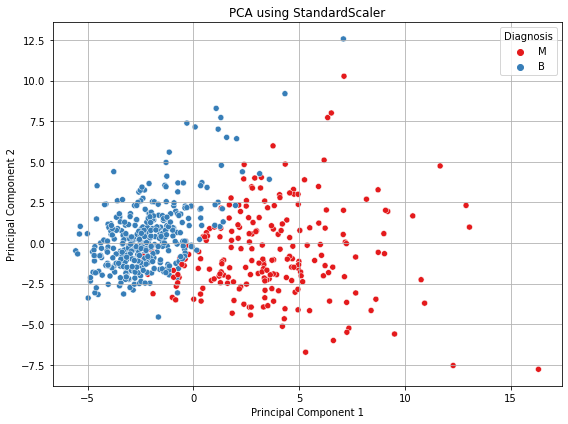

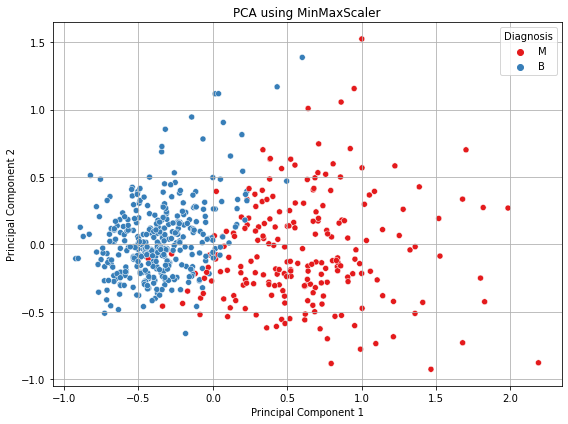

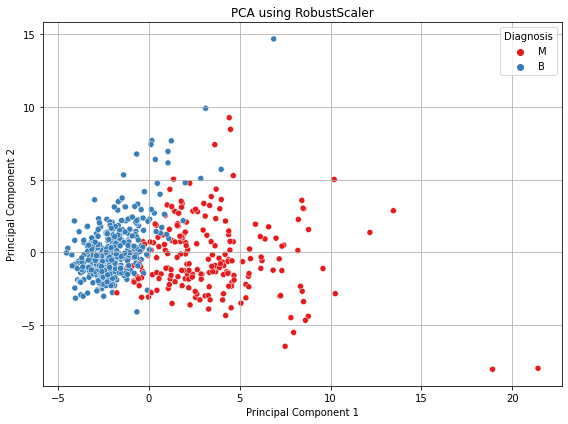

PCA with scaling completed. CSV, plots saved, and all plots displayed.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset
column_names = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv('wdbc.data', header=None, names=column_names)
df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Step 2: Define Scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Step 3: Apply PCA after Scaling
for name, scaler in scalers.items():
    # Apply scaling
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create DataFrame for PCA results
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Diagnosis'] = y.values
    
    # Save CSV
    pca_df.to_csv(f'PCA_{name}.csv', index=False)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', palette='Set1')
    plt.title(f'PCA using {name}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Diagnosis')
    plt.grid(True)
    plt.tight_layout()
    
    # Save and Show
    plt.savefig(f'PCA_{name}.png')
    plt.show()   # <--- this will display every plot

print("PCA with scaling completed. CSV, plots saved, and all plots displayed.")
